In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
df = pd.read_csv('C:/Users/Dareen/OneDrive/Desktop/ML/1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [29]:
Df=df.join(pd.get_dummies(df['State']))
Df
Df.drop('State',axis=1)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,192261.83000,False,False,True
1,162597.70,151377.590,443898.5300,191792.06000,True,False,False
2,153441.51,101145.550,407934.5400,191050.39000,False,True,False
3,144372.41,118671.850,383199.6200,182901.99000,False,False,True
4,142107.34,91391.770,366168.4200,166187.94000,False,True,False
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,True,False,False
996,134970.00,130390.080,329204.0228,164336.60550,True,False,False
997,100275.47,241926.310,227142.8200,413956.48000,True,False,False
998,128456.23,321652.140,281692.3200,333962.19000,True,False,False


In [30]:
x=Df.drop('Profit',axis=1)
y=Df.iloc[:,4]

y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [31]:
X=x.drop('State',axis=1)
X

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.800,471784.1000,False,False,True
1,162597.70,151377.590,443898.5300,True,False,False
2,153441.51,101145.550,407934.5400,False,True,False
3,144372.41,118671.850,383199.6200,False,False,True
4,142107.34,91391.770,366168.4200,False,True,False
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,True,False,False
996,134970.00,130390.080,329204.0228,True,False,False
997,100275.47,241926.310,227142.8200,True,False,False
998,128456.23,321652.140,281692.3200,True,False,False


<Axes: >

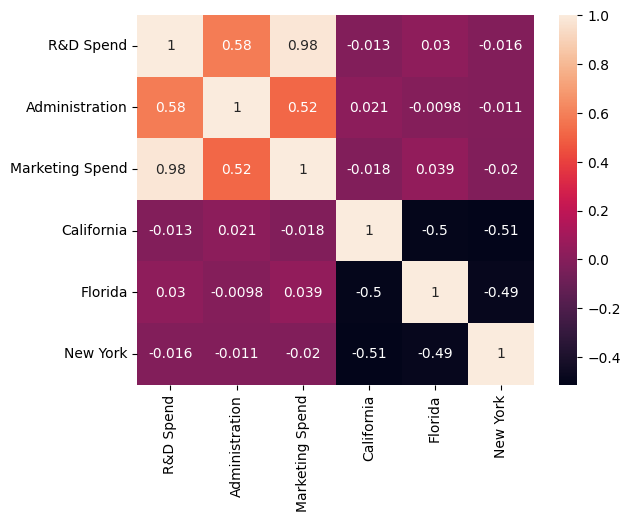

In [32]:
sns.heatmap(X.corr(),annot=True)

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([124953.79964691, 111734.4950316 ,  90901.26364246, 127455.94292207,
       161129.99124218,  90972.77173954, 154891.79921465, 139296.99831535,
        88028.04031292,  90667.78522922, 167567.44512269, 162870.30933751,
       104468.85237493, 108151.33521543,  91156.28051896, 159354.34982184,
       116792.61755437, 104673.06302735, 120511.90141856, 105579.62753158,
        75617.72527019, 125867.25652506,  64489.78255518,  70121.93853858,
       170731.05792008, 164029.94702986, 178604.70505217, 135581.8016896 ,
       121706.61701266, 162688.7689977 , 145511.31239215, 113471.14631659,
       165275.73913641, 141803.22871506,  64513.04425429,  88933.74337007,
        82148.86670558,  74213.40921359, 116876.82828018, 170635.42667681,
        59635.84593443,  88218.41683724, 120923.47393602, 142173.47183749,
       168989.01681668, 146927.44477359, 152810.08926217, 138823.79020677,
       142008.0554969 ,  74584.51377479, 114481.09611289,  61817.27425639,
       171089.43534572, 1

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.982527784600816